In [1]:
#数据加载
import pandas as pd
import numpy as np
data = pd.read_csv("task1_data.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'task1_data.csv'

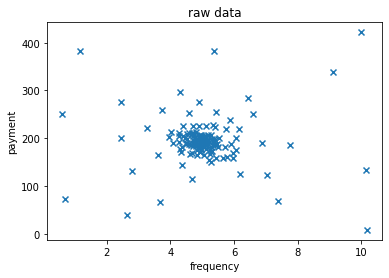

In [4]:
#数据可视化
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(data.loc[:,'frequency'],data.loc[:,'payment'],marker='x')
plt.title('raw data')
plt.xlabel('frequency')
plt.ylabel('payment')
plt.show()

In [8]:
#x1 y1 x赋值
x = data
x1 = data.loc[:,'frequency']
x2 = data.loc[:,'payment']
x.head()
x1.head()
x2.head()

0    197.922
1    197.953
2    194.836
3    189.600
4    189.549
Name: payment, dtype: float64

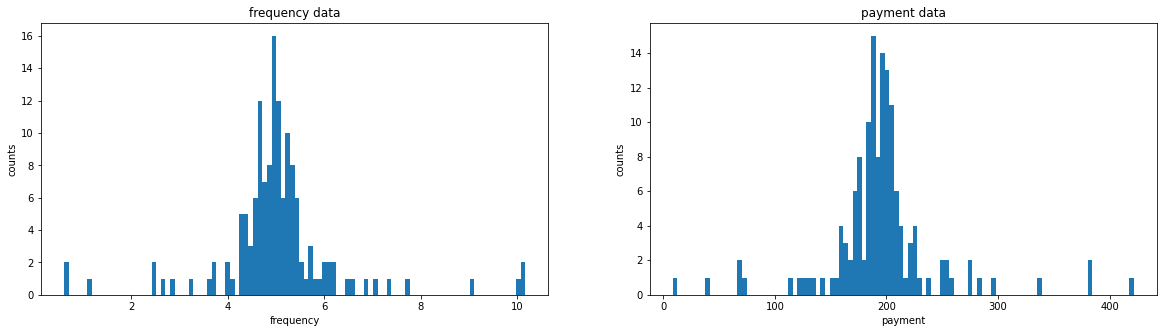

In [15]:
#数据分布的可视化操作
fig2 = plt.figure(figsize=(20,5))
fig2_1 = plt.subplot(121)
plt.hist(x1,bins=100)
plt.title('frequency data')
plt.xlabel('frequency')
plt.ylabel('counts')

fig2_1 = plt.subplot(122)
plt.hist(x2,bins=100)
plt.title('payment data')
plt.xlabel('payment')
plt.ylabel('counts')

plt.show()

In [17]:
#计算平均值u,以及标准差sigma
x1_mean = x1.mean()
x1_sigma = x1.std()
print(x1_mean,x1_sigma)

x2_mean = x2.mean()
x2_sigma = x2.std()
print(x2_mean,x2_sigma)

5.033123443661971 1.2756307632971424
194.815448943662 50.42404624918217


In [20]:
#计算基于高斯分布的概率密度函数
from scipy.stats import norm
x1_range = np.linspace(0,10,300)
x1_normal = norm.pdf(x1_range,x1_mean,x1_sigma)
x2_range = np.linspace(0,400,300)
x2_normal = norm.pdf(x2_range,x2_mean,x2_sigma)
# print(x1_range,x1_range.shape)
# print(x1_normal,x1_normal.shape)

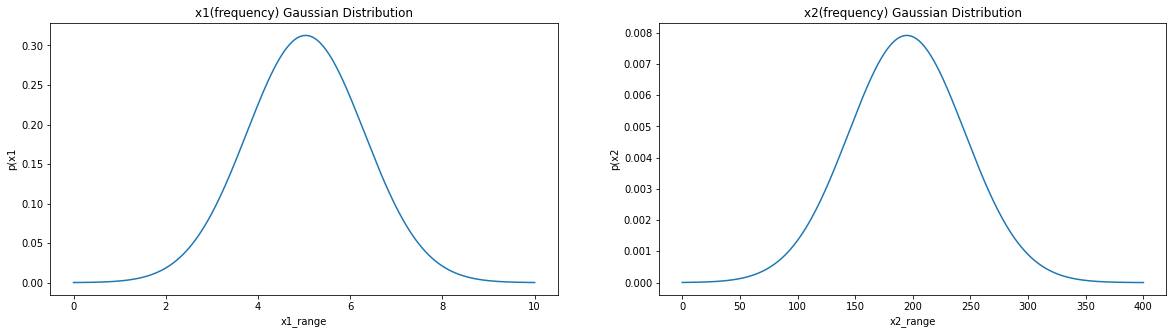

In [25]:
# 原始数据的高斯分布概率密度函数可视化
fig3 = plt.figure(figsize=(20,5))
fig3_1 = plt.subplot(121)
plt.plot(x1_range,x1_normal)
plt.title('x1(frequency) Gaussian Distribution')
plt.xlabel('x1_range')
plt.ylabel('p(x1')

fig3_2 = plt.subplot(122)
plt.plot(x2_range,x2_normal)
plt.title('x2(frequency) Gaussian Distribution')
plt.xlabel('x2_range')
plt.ylabel('p(x2')
plt.show()

In [27]:

import math
#设置范围
x_min, x_max = 0, 10
y_min, y_max = 0, 400
h1 = 0.1
h2 = 0.1
#生成矩阵数据
xx, yy = np.meshgrid(np.arange(x_min, x_max, h1), np.arange(y_min, y_max, h2))
print(xx.shape,yy.shape)

#展开矩阵数据
x_range = np.c_[xx.ravel(), yy.ravel()]
x1 = np.c_[xx.ravel()]
x2 = np.c_[yy.ravel()]
x_range_df = pd.DataFrame(x_range)
#x_range_df.to_csv('data.csv')
#高斯分布参数
u1 = x1_mean
u2 = x2_mean
sigma1 = x1_sigma
sigma2 = x2_sigma

#计算高斯分布概率
p1 = 1/sigma1/math.sqrt(2*math.pi)*np.exp(-np.power((x1-u1),2)/2/math.pow(sigma1,2))
p2 = 1/sigma2/math.sqrt(2*math.pi)*np.exp(-np.power((x2-u2),2)/2/math.pow(sigma2,2))
p = np.multiply(p1,p2)
#对概率密度维度转化
p_2d = p.reshape(xx.shape[0],xx.shape[1])

(4000, 100) (4000, 100)


D:\anaconda\envs\env_ml\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


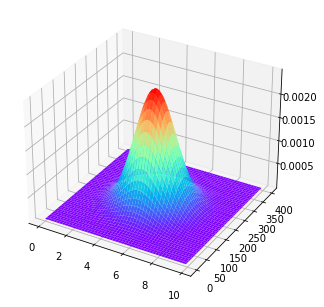

In [28]:
# 综合高斯分布密度函数的可视化
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
fig5 = plt.figure()
axes3d = Axes3D(fig5)
axes3d.plot_surface(xx,yy,p_2d,cmap=cm.rainbow)

In [29]:
# 建立异常检测模型
from sklearn.covariance import EllipticEnvelope
model = EllipticEnvelope(contamination=0.03)
model.fit(x)

EllipticEnvelope(contamination=0.03)

In [33]:
# 模型预测
y_predict = model.predict(x)
print(y_predict)
print(pd.value_counts(y_predict))

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 1    137
-1      5
dtype: int64


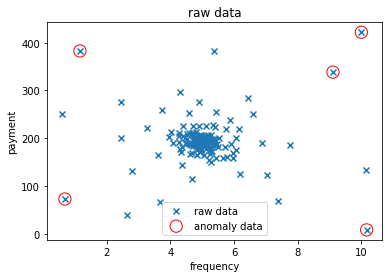

In [37]:
# 数据可视化
fig6 = plt.figure()
plt.scatter(data.loc[:,'frequency'],data.loc[:,'payment'],marker='x',
            label = 'raw data')
plt.scatter(data.loc[:,'frequency'][y_predict==-1],data.loc[:,'payment'][y_predict==-1],marker='o'
            ,facecolor='none',edgecolors='red',s=150,label='anomaly data')
plt.title('raw data')
plt.xlabel('frequency')
plt.ylabel('payment')
plt.legend()
plt.show()

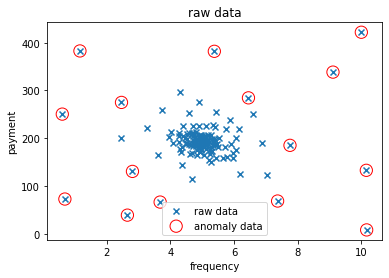

In [39]:
model = EllipticEnvelope(contamination=0.1)
model.fit(x)
# 模型预测
y_predict = model.predict(x)
# print(y_predict)
# print(pd.value_counts(y_predict))
# 数据可视化
fig7 = plt.figure()
plt.scatter(data.loc[:,'frequency'],data.loc[:,'payment'],marker='x',
            label = 'raw data')
plt.scatter(data.loc[:,'frequency'][y_predict==-1],data.loc[:,'payment'][y_predict==-1],marker='o'
            ,facecolor='none',edgecolors='red',s=150,label='anomaly data')
plt.title('raw data')
plt.xlabel('frequency')
plt.ylabel('payment')
plt.legend()
plt.show()

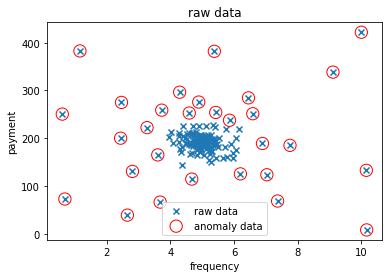

In [40]:

model = EllipticEnvelope(contamination=0.2)
model.fit(x)
# 模型预测
y_predict = model.predict(x)
# print(y_predict)
# print(pd.value_counts(y_predict))
# 数据可视化
fig8 = plt.figure()
plt.scatter(data.loc[:,'frequency'],data.loc[:,'payment'],marker='x',
            label = 'raw data')
plt.scatter(data.loc[:,'frequency'][y_predict==-1],data.loc[:,'payment'][y_predict==-1],marker='o'
            ,facecolor='none',edgecolors='red',s=150,label='anomaly data')
plt.title('raw data')
plt.xlabel('frequency')
plt.ylabel('payment')
plt.legend()
plt.show()